# **Pinpointing rare categories in categorical variables**

Rare categories, are those that are only present for a tiny minority of the observations in the dataset. Normally, we consider anything under 5% or 1% a rare occurrence. In this recipe, we will learn to quantify and visualize the frequency of rare categories, utilizing the Car Evaluation dataset from the UCI Machine Learning Repository.

To run this recipe, please visit the UCI Machine Learning Repository and download this [data set](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation). You need to click and download the "Data Folder". Save it to the parent directory of this repository (../car.data) to run the notebook as is.

**Acknowledgements**

Thanks to UCI Machine Learnign Repository for making the data available:

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the Car Evaluation Dataset

# this data does not include the columns, so we need
# to indicate so while loading by passing header=None

data = pd.read_csv('car.data', header=None)

# add the column names manually
# column descriptions are indicated in the UCI website
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
# let's find the cardinality of the variable
# the number of unique categories

data['class'].nunique()

4

In [4]:
# let's inspect the name of the categories

data['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [5]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [6]:
# now let's calculate the frequency for each category

# code as in book:

label_freq = data['class'].value_counts() / len(data)

# let's inspect the frequency of the labels
label_freq

unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64

In [7]:
# same code a bit nicer

# now let's calculate the frequency for each category

# first we calculate the total number of cars in the dataset
total_cars = len(data)
print('Total number of cars {}'.format(total_cars))

# then we calculate label frequency
# value_counts() counts the number of cars per label
# by dividing by total cars we obtain the frequency

label_freq = data['class'].value_counts() / total_cars

# let's inspect the frequency of the labels
label_freq

Total number of cars 1728


unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64

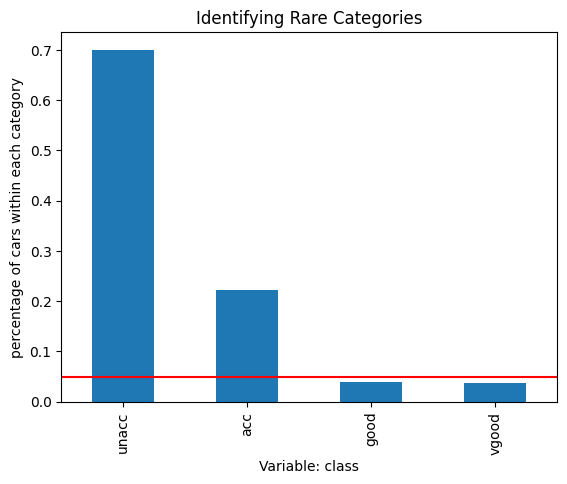

In [8]:
# let's make plot with the category frequencies
fig = label_freq.sort_values(ascending=False).plot.bar()

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

# add axis labels and title
fig.set_ylabel('percentage of cars within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()